<center>
<h1><b>Лабораторна робота №2</b></h1>
</center>
<p><b>Тема:</b> Основи роботи з сигналами в Python.</p>
<p><b>Мета:</b> Закріпити теоретичні знання щодо моделювання періодичних сигналів за допомогою ряду Фур’є та різних систем базисних функцій, набути навичок гармонічного аналізу та синтезу.</p>
<center>
    
<h2><b>Завдання для самостійної роботи</b></h2>
</center>
<p>1. Згідно із заданим варіантом розглянути періодичний сигнал та розкласти його спочатку:</p>
<img src="src\screenshot.png" alt="!" style="display:block; margin:auto; width:80%;">

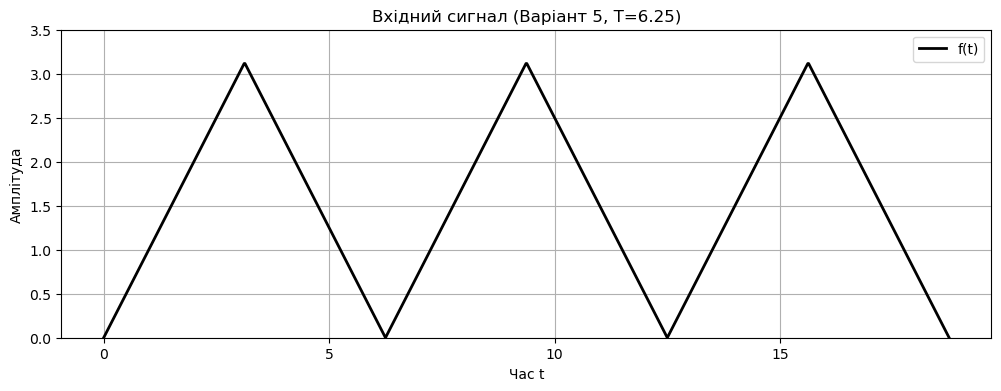

In [7]:
import numpy as np
import matplotlib.pyplot as plt

T = 6.25             
t1 = T / 2          
t2 = T             

def signal_func(t):    
    tm = t % T  
    
    if 0 <= tm <= t1:
        return tm            
    elif t1 < tm <= t2:
        return t2 - tm        
    else:
        return 0.0            

t_plot = np.linspace(0, 3 * T, 1000)
f_original = np.array([signal_func(t) for t in t_plot])

# Построение графика
plt.figure(figsize=(12, 4))
plt.plot(t_plot, f_original, 'k', linewidth=2, label='f(t)')
plt.title(f'Вхідний сигнал (Варіант 5, T={T})')
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0, 16, 5)) 
plt.ylim(0, 3.5) 
plt.show()

<p>1.1. У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду $a_k$ та $b_k$. Виконати синтез сигналу. Побудувати відповідні графіки.</p> 

a0 = 3.1250
Перші 4 ak: ['-1.2665', '0.0000', '-0.1407', '0.0000']
Перші 4 bk: ['-0.0000', '0.0000', '0.0000', '-0.0000']


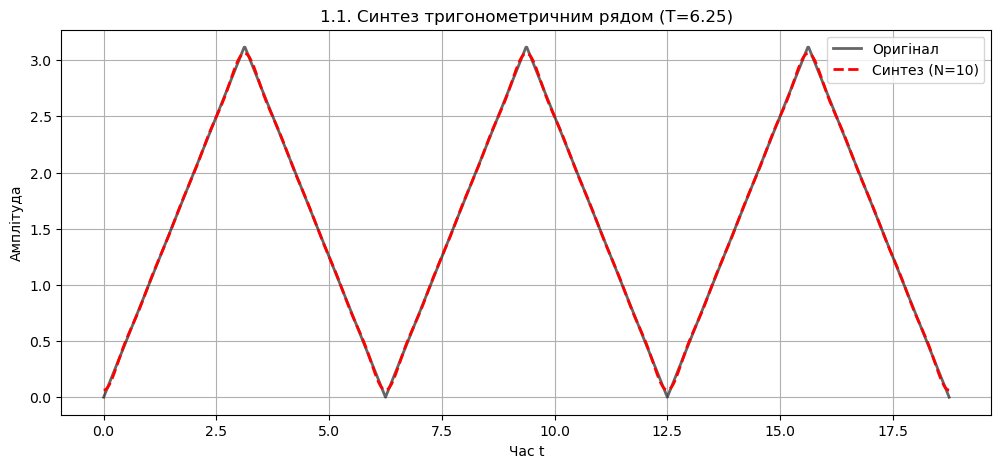

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
T = 6.25            
t1 = T / 2          
t2 = T              
N = 10          

def signal_func(t):    
    tm = t % T      
    if 0 <= tm <= t1:
        return tm
    elif t1 < tm <= t2:
        return t2 - tm
    else:
        return 0.0

t_plot = np.linspace(0, 3 * T, 1000)
f_original = np.array([signal_func(t) for t in t_plot])
w0 = 2 * np.pi / T 
a0_val, _ = quad(signal_func, 0, T)
a0 = (2 / T) * a0_val
ak = np.zeros(N + 1)
bk = np.zeros(N + 1)
for k in range(1, N + 1):
    res_a, _ = quad(lambda t: signal_func(t) * np.cos(k * w0 * t), 0, T)
    res_b, _ = quad(lambda t: signal_func(t) * np.sin(k * w0 * t), 0, T)    
    ak[k] = (2 / T) * res_a
    bk[k] = (2 / T) * res_b
print(f"a0 = {a0:.4f}")
print("Перші 4 ak:", [f"{x:.4f}" for x in ak[1:5]])
print("Перші 4 bk:", [f"{x:.4f}" for x in bk[1:5]])
y_synth_trig = np.full_like(t_plot, a0 / 2)
for k in range(1, N + 1):
    y_synth_trig += ak[k] * np.cos(k * w0 * t_plot) + bk[k] * np.sin(k * w0 * t_plot)
plt.figure(figsize=(12, 5))
plt.plot(t_plot, f_original, 'k', linewidth=2, alpha=0.6, label='Оригінал')
plt.plot(t_plot, y_synth_trig, 'r--', linewidth=2, label=f'Синтез (N={N})')
plt.title(f'1.1. Синтез тригонометричним рядом (T={T})')
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.show()

<p>1.2. У тригонометричний ряд Фур’є, отримавши коефіцієнти $А_k$ , $\phi_k$. 
Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.</p>

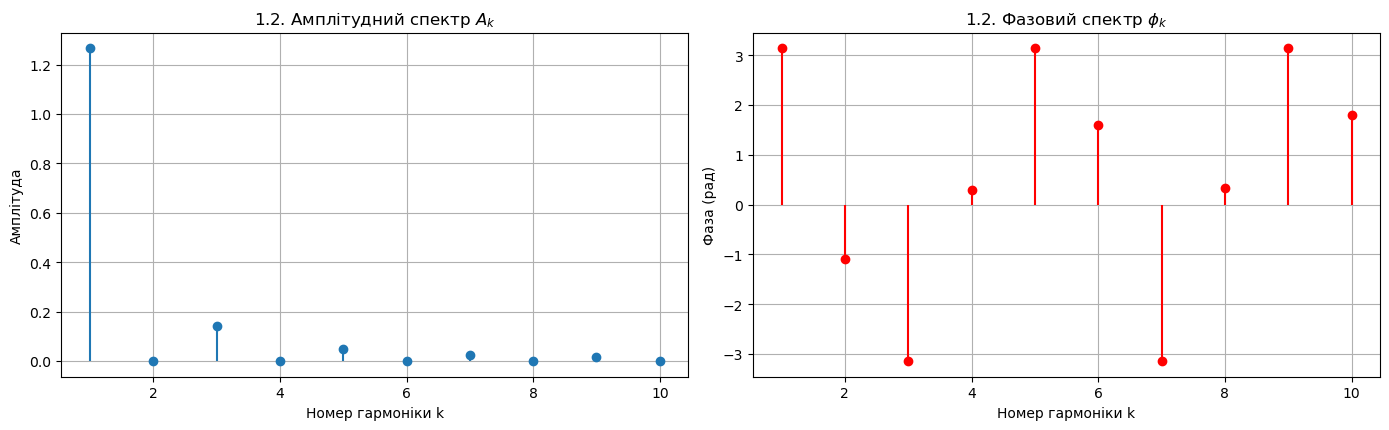

In [15]:
k_vals = np.arange(1, N + 1)
A_k = np.sqrt(ak[1:]**2 + bk[1:]**2)
phi_k = -np.arctan2(bk[1:], ak[1:])
C_k_vals = (ak[1:] - 1j * bk[1:]) / 2
C_k_abs = np.abs(C_k_vals)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.stem(k_vals, A_k, basefmt=" ")
plt.title(r'1.2. Амплітудний спектр $A_k$')  
plt.xlabel('Номер гармоніки k')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(k_vals, phi_k, linefmt='r', markerfmt='ro', basefmt=" ")
plt.title(r'1.2. Фазовий спектр $\phi_k$')
plt.xlabel('Номер гармоніки k')
plt.ylabel('Фаза (рад)')
plt.grid(True)

plt.tight_layout()
plt.show()

<p>1.3. У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. 
Виконати синтез сигналу.</b>

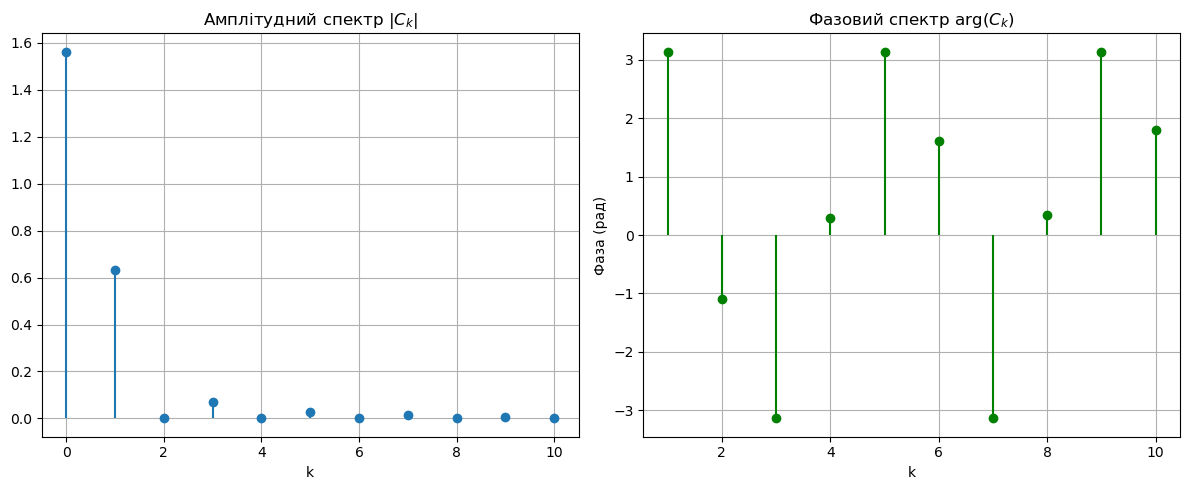

In [16]:
k_vals = np.arange(1, N + 1)
C_k_vals = (ak[1:] - 1j * bk[1:]) / 2
C_0 = a0 / 2
Ck_mod = np.abs(C_k_vals)
Ck_arg = np.angle(C_k_vals)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem([0] + list(k_vals), [np.abs(C_0)] + list(Ck_mod), basefmt=" ")
plt.title(r'Амплітудний спектр $|C_k|$')
plt.xlabel('k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(k_vals, Ck_arg, linefmt='g', markerfmt='go', basefmt=" ")
plt.title(r'Фазовий спектр arg($C_k$)')
plt.xlabel('k')
plt.ylabel('Фаза (рад)')
plt.grid(True)

plt.tight_layout()
plt.show()

<p>1.4. У ряд Фур’є за системою базисних функцій Уолша-Пелі.
    
1.5. Кількість гармонік: N=8. Побудувати відповідний спектр сигналу. 
Виконати синтез сигналу.</b>

Коефіцієнти Уолша (W_k):
['1.5625', '0.0000', '0.0000', '0.0000', '-0.0015', '-0.3906', '-0.7812', '0.0000']


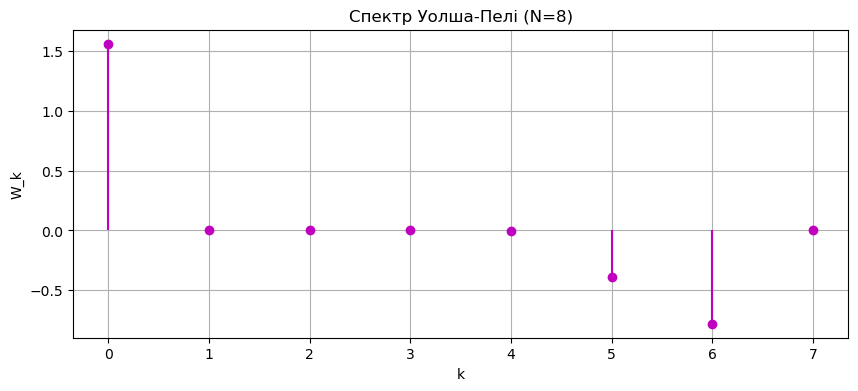

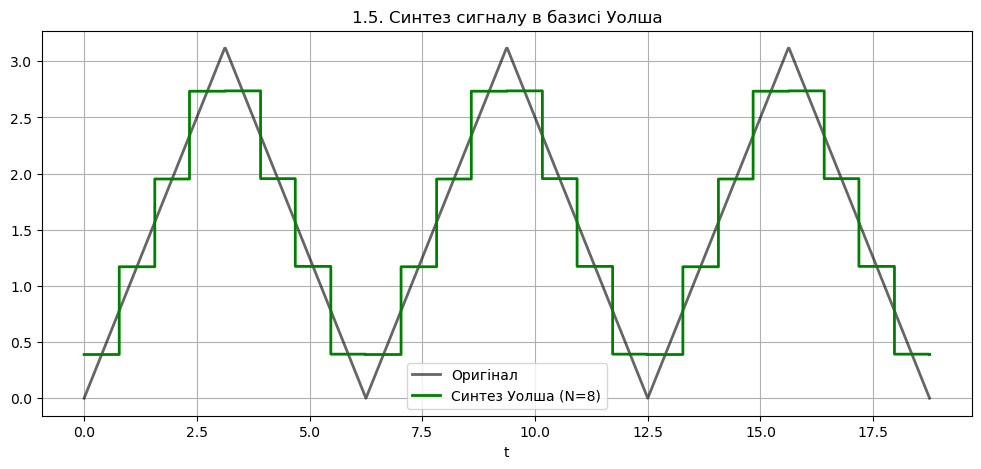

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hadamard

N_walsh = 8

def get_walsh_matrix(n_funcs, t_arr, period):
    H = hadamard(n_funcs)
    t_norm = (t_arr % period) / period
    indices = np.floor(t_norm * n_funcs).astype(int)
    indices = np.clip(indices, 0, n_funcs - 1)
    return H[:, indices]

t_samples = np.linspace(0, T, 2048, endpoint=False)
y_samples = np.array([signal_func(t) for t in t_samples])
W_matrix = get_walsh_matrix(N_walsh, t_samples, T)

walsh_coeffs = np.mean(y_samples * W_matrix, axis=1)

print("Коефіцієнти Уолша (W_k):")
print([f"{w:.4f}" for w in walsh_coeffs])

plt.figure(figsize=(10, 4))
plt.stem(np.arange(N_walsh), walsh_coeffs, linefmt='m', markerfmt='mo', basefmt=" ")
plt.title(f'Спектр Уолша-Пелі (N={N_walsh})')
plt.xlabel('k')
plt.ylabel('W_k')
plt.grid(True)
plt.show()

def synthesize_walsh(t_arr, coeffs, period):
    n = len(coeffs)
    W_mat = get_walsh_matrix(n, t_arr, period)
    return np.dot(coeffs, W_mat)

y_synth_walsh = synthesize_walsh(t_plot, walsh_coeffs, T)

plt.figure(figsize=(12, 5))
plt.plot(t_plot, f_original, 'k', linewidth=2, alpha=0.6, label='Оригінал')
plt.step(t_plot, y_synth_walsh, 'g', where='mid', linewidth=2, label=f'Синтез Уолша (N={N_walsh})')
plt.title(f'1.5. Синтез сигналу в базисі Уолша')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()

<p>
    
2. Синтезувати ( відновити) сигнали у кожному базисі. Зобразити на   одному 
графіку вихідний сигнал, синтезований за допомогою тригонометричного 
ряду Фур’є та синтезований за допомогою базису Уолша-Пелі.
    
3. Обчислити норму похибки апроксимації для кожного з базисів для одного 
й того самого значення N. Зробити висновки щодо якості апроксимації 
кожним з методів.</b>

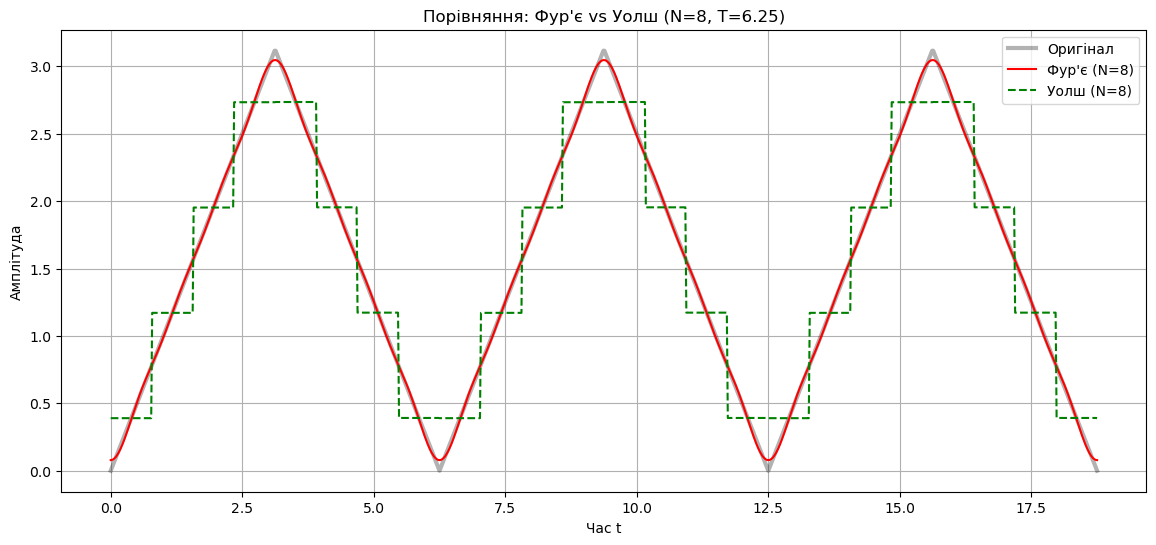


Похибка апроксимації (для N=8):
Тригонометричний ряд Фур'є:
L2 (Похибка):         0.50992
Ряд Уолша-Пелі:
L2 (Похибка):         7.13887

ВИСНОВОК
Ряд Фур'є показав меншу похибку.
Це логічно, оскільки ваш сигнал є плавним,
а базис Уолша складається з прямокутних імпульсів і краще підходить для розривних сигналів.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import hadamard

T = 6.25
N = 8
t1 = T / 2
t2 = T

def signal_func(t):
    tm = t % T
    if 0 <= tm <= t1:
        return tm
    elif t1 < tm <= t2:
        return t2 - tm
    else:
        return 0.0

def get_signal_array(t_arr):
    return np.array([signal_func(t) for t in t_arr])

def get_walsh_matrix(n_funcs, t_arr, period):
    H = hadamard(n_funcs)
    t_norm = (t_arr % period) / period
    indices = np.floor(t_norm * n_funcs).astype(int)
    indices = np.clip(indices, 0, n_funcs - 1)
    return H[:, indices]

t_plot = np.linspace(0, 3 * T, 1000)
y_original = get_signal_array(t_plot)

w0 = 2 * np.pi / T
# a0
a0_val, _ = quad(signal_func, 0, T)
y_fourier = np.full_like(t_plot, (2/T) * a0_val / 2)

for k in range(1, N + 1):
    ak, _ = quad(lambda t: signal_func(t) * np.cos(k * w0 * t), 0, T)
    bk, _ = quad(lambda t: signal_func(t) * np.sin(k * w0 * t), 0, T)
    
    ak = (2/T) * ak
    bk = (2/T) * bk
    
    y_fourier += ak * np.cos(k * w0 * t_plot) + bk * np.sin(k * w0 * t_plot)

t_samples = np.linspace(0, T, 4096, endpoint=False) 
y_samples_walsh = get_signal_array(t_samples)
W_matrix_samples = get_walsh_matrix(N, t_samples, T)

walsh_coeffs = np.mean(y_samples_walsh * W_matrix_samples, axis=1)
W_matrix_plot = get_walsh_matrix(N, t_plot, T)
y_walsh = np.dot(walsh_coeffs, W_matrix_plot)
plt.figure(figsize=(14, 6))

plt.plot(t_plot, y_original, 'k', linewidth=3, alpha=0.3, label='Оригінал')
plt.plot(t_plot, y_fourier, 'r', linewidth=1.5, label=f"Фур'є (N={N})")
plt.plot(t_plot, y_walsh, 'g--', linewidth=1.5, label=f"Уолш (N={N})")
plt.title(f"Порівняння: Фур'є vs Уолш (N={N}, T={T})")
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(True)
plt.show()

l2_f = np.linalg.norm(y_original - y_fourier)
l2_w = np.linalg.norm(y_original - y_walsh)

print(f"\nПохибка апроксимації (для N={N}):")
print(f"Тригонометричний ряд Фур'є:")
print(f"L2 (Похибка):         {l2_f:.5f}")
print(f"Ряд Уолша-Пелі:")
print(f"L2 (Похибка):         {l2_w:.5f}")

print("\nВИСНОВОК")
if l2_f < l2_w:
    print("Ряд Фур'є показав меншу похибку.")
    print("Це логічно, оскільки ваш сигнал є плавним,")
    print("а базис Уолша складається з прямокутних імпульсів і краще підходить для розривних сигналів.")
else:
    print("Ряд Уолша показав меншу похибку.")

<h1><b>Контрольні запитання</b></h1>

1. Як впливає симетрія періодичного сигналу (парна, непарна, відсутність симетрії) на структуру його тригонометричного ряду Фур’є?

Парна функція ($f(t) = f(-t)$): У розкладі присутні лише косинусні складові (коефіцієнти $a_k$), а коефіцієнти при синусах дорівнюють нулю ($b_k = 0$).

Непарна функція ($f(t) = -f(-t)$): Ряд містить тільки синусні складові (коефіцієнти $b_k$), тоді як усі косинусні коефіцієнти $a_k = 0$ (включно з $a_0 = 0$).

Відсутність симетрії: У тригонометричному ряді наявні як косинусні ($a_k \neq 0$), так і синусні ($b_k \neq 0$) компоненти.

2. Чому для апроксимації прямокутного імпульсу базис Уолша-Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є при однаковій кількості базисних функцій?

Це пов’язано з тим, що функції Уолша мають прямокутну форму та приймають лише значення $+1$ або $-1$. Вони добре узгоджуються зі структурою прямокутних сигналів і здатні точно відтворювати різкі стрибки за допомогою невеликої кількості членів.
Натомість базис Фур’є складається з гладких синусоїд, які погано описують розриви та різкі переходи (проявляється ефект Гіббса), тому для якісної апроксимації прямокутного імпульсу потрібна велика кількість гармонік.

3. Як пов’язані між собою три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна)?

Усі три форми є різними способами подання одного й того ж розкладу сигналу. Перехід між ними здійснюється через відповідні співвідношення між коефіцієнтами:

Амплітуда: $A_k = \sqrt{a_k^2 + b_k^2}$

Фаза: $\phi_k = -\operatorname{arctg}\left(\frac{b_k}{a_k}\right)$

Комплексний коефіцієнт: $C_k = \frac{1}{2}(a_k - j b_k)$

4. Що таке узагальнений ряд Фур’є? Наведіть умови, за яких система функцій є ортонормованою.

Узагальнений ряд Фур’є — це представлення сигналу у вигляді суми за довільною системою ортогональних функцій.
Система функцій вважається ортонормованою за виконання двох умов:
Ортогональність — скалярний добуток двох різних функцій дорівнює нулю.
Нормованість — скалярний добуток функції самої на себе дорівнює одиниці.
Ці властивості суттєво спрощують обчислення коефіцієнтів розкладу, оскільки кожен з них визначається незалежно від інших.

5. Чи можна використовувати базис Уолша для апроксимації гладкого синусоїдального сигналу? Яка буде похибка порівняно з базисом Фур’є?

Так, базис Уолша можна застосовувати для такої апроксимації, однак це є нераціональним.
За однакової кількості базисних функцій похибка буде значно більшою, ніж при використанні базису Фур’є. Це пояснюється тим, що функції Уолша мають ступінчастий характер, і для відтворення плавної синусоїди необхідна дуже велика кількість таких сходинок.
